In [22]:
import numpy as np
import scipy.io
import scipy.signal
from matplotlib import pyplot as plt
import cmath
import numpy as np
import scipy.io
import scipy.signal
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

Sample rate: 32000
Number of samples: 90267
Length of audio: 2.82084375 seconds


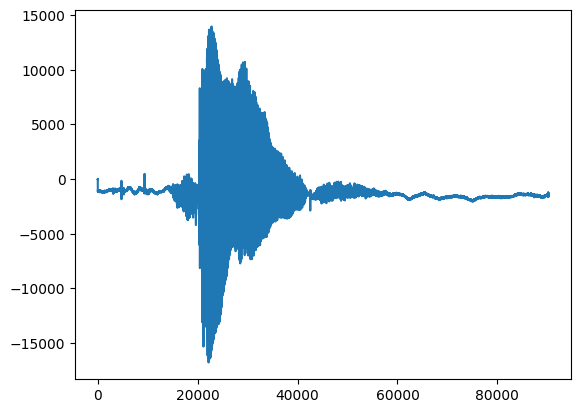

In [6]:
samplerate, data = scipy.io.wavfile.read("science.wav")
length = (data.shape[0] / samplerate)
print("Sample rate:", samplerate)
print("Number of samples:", data.shape[0])
print("Length of audio:", length, "seconds")
plt.plot(data)

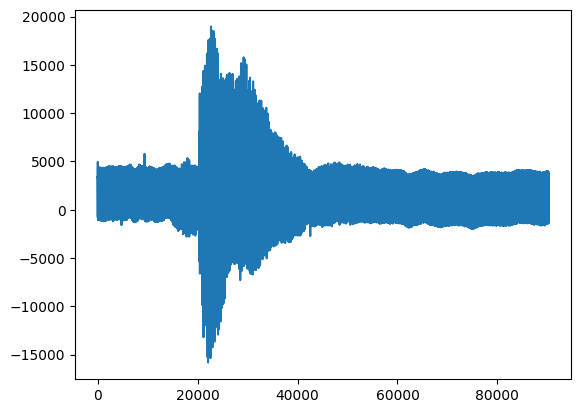

In [5]:
data_std = np.std(data)
noise_10dB = np.random.rand(len(data))*(data_std*np.sqrt(10))     
signal_10dB = data + noise_10dB
plt.plot(signal_10dB)

In [7]:
def wiener(im,mysize=None,noise=None):
    im = np.asarray(im)
    if mysize is None:
        mysize = [3] * im.ndim
    mysize = np.asarray(mysize)
    if mysize.shape == ():
        mysize = np.repeat(mysize.item(), im.ndim)

    lMean = np.correlate(im, np.ones(mysize), 'same') / np.prod(mysize, axis=0)

    lVar = (np.correlate(im ** 2, np.ones(mysize), 'same') /
            np.prod(mysize, axis=0) - lMean ** 2)

    if noise is None:
        noise = np.mean(np.ravel(lVar), axis=0)

    res = (im - lMean)
    res *= (1 - noise / lVar)
    res += lMean
    out = np.where(lVar < noise, lMean, res)

    return out

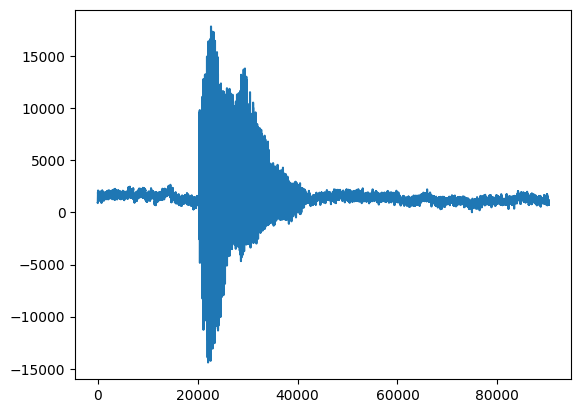

In [14]:
plt.plot(wiener(signal_10dB,50))